# Logistic Regression
Hey everyone welcome to Session 2 for this workshop. In this session we will do the following:
- Understand what is a classification problem and why we can't use a simple Linear Regression
- Understand the Logistic Regression Algorithm and implement it on the famous Titanic dataset. Hope you all have downloaded the dataset. If you haven't this would be a good time to download it via the link given below

[Link for the Dataset](https://drive.google.com/drive/folders/1RnE61OQAZvjwsFQYBMsQstRDGdUZ1hks?usp=sharing)


Let's begin!!

## What is a Classification Problem?
We identify problem as classification problem when the dependent(or the target) variable is in categorical form i.e. in classes like positive class and negative class.

![](assets/classification-defn.png)

In the above image there are only two classes, but in any real life situation there could be many classes. Take for example, classifying the breed to which a dog belongs. There are 360 officially recognised breeds to classify any dog into!!

## What's the problem with Linear Regression?
Suppose we have a data of tumor size vs its malignancy. As it is a classification problem, if we plot, we can see, all the values will lie on 0 and 1. And if we fit best found regression line, by assuming the threshold at 0.5, we can do line pretty reasonable job.

![](assets/tumor-no-outlier.png)

We can decide the point on the x axis from where all the values lie to its left side are considered as negative class and all the values lie to its right side are positive class.

![](assets/tumor-threshold.png)

But what happens to this whole dynamic when there is an outlier? Let us look at the case when there is an outlier and we threshold the values at 0.5

![](assets/tumor-outlier.png)

3/5 positive cases have been misclassified into the negative class!! This becomes a serious problem when using a Linear model for a classification task.

Well we have now established that it isn't exactly optimal to use a Linear Regression model for a classification problem. But the question that remains is, if we can't use a Linear approximation fro our model, what do we use?

By looking at the above example some of you might be thinkgin that a simple step function should be good right?
Well not exactly. What happens to any data point which is describe exactly at the point at which the function changes it's value? Even if we find a fix to that, the computations involved with a step function are very complicated compared to the existing methods.

Let's move on and see what exactly is used for a Classification Problem

## Logistic Regression
In order to deal with outliers and reduce the misclassification of data, Logistic Regression uses a sigmoid function which is described below

![](assets/sigmoid.png)
![](assets/sigmoid-graph.png)

Now whenever the model comes across an outlier, it won't be affected by it and still give us somewhat accurate results

![](assets/sigmoid-outlier.png)

If we threshold the above fucntion with a value of 0.5, the predictions work perfectly and we can make more accurate predictions than we would if we had used a linear regression.

In Linear Regression we make a similar linear assumption as a Linear Regression

We say
![](assets/linear-func.png)

So the model now uses the below given logistic function:
![](assets/logistic-func.png)

Since the sigmoid function always gives values between 0 and 1, we can say that it is giving us the probability that a particular observation belongs to a particular class.

### The Cost Function
Many times while learning about the cost function for a logistic regression, the first question that comes to our mind is, why does the cost function have to be different in Logistic Regression? Why can't we use the same Mean Squared Error cost function that was used in Linear Regression? Well the answer is that, if we combine the Mean Squared Error along with the sigmoid fucntion that we've defined above, what we get is a non-convex cost function as shown below.

![](assets/MSE-Sigmoid.png)

In such a situation, there are many local minima present but they are not the global minima. Using our logic of Gradient Descent our model will 100% get stuck in one of the local minima and think it is the global minima.

For this reason, we use another cost function which has a very intuitive logic.

The cost function is described below:
![](assets/logreg-cost.png)

Or in a single line:
![](assets/logreg-cost-simple.png)

And well the ideas behind the logistic regression is still the same here:

![](assets/Grad-desc.png)

That's it!

It's that simple!!

Let's move on to the code implementation part of this!

Let us start by importing some libraries

Either the complete thing is a code along or we do only the model part as a code along depending on the time that's available.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#Reading the dataset and storing it in a Pandas DataFrame
data = pd.read_csv('titanic.csv')

#Let's check the first 5 rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
data.shape

(891, 12)

In [28]:
#Check for missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Clearly there are missing values in this dataset.

In order to deal with the missing values, we must understand the data at a better level. There are many missing values in the Age column. From the columns whose values are 100% known, a somewhat good indicator of the age could be the Passenger's class which is given by Pclass. We could try filling in the missing values in Age using the Pclass.

As for the Cabin, we could check if only a certain Pclass get's cabins and if that isn't the case, we can assume fill in the value of "Not Assigned" for all the missing Cabin values. 

Embarked is the column that respresents the port from which the person got onto the Titanic when it had sailed. Analysing this and figuring out where the most number of people embarked from, will help us in dealing with the two missing values there.

Let's start with Age

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


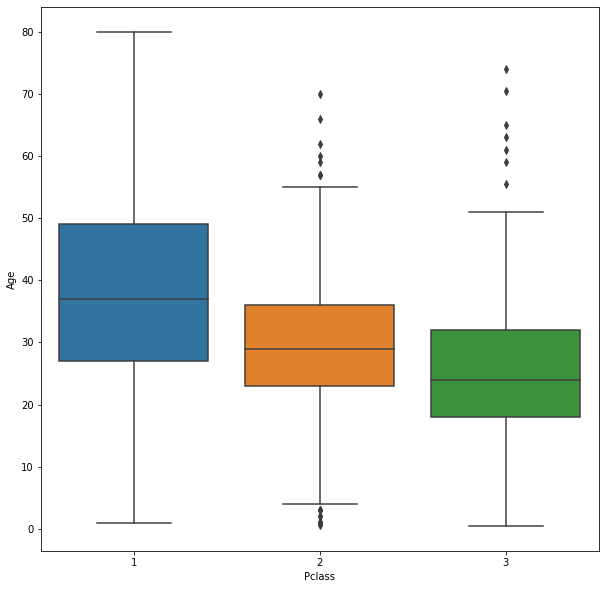

In [29]:
# Boxplot of Age vs Pclass
plt.figure(figsize = (10,10))
sns.boxplot(data['Pclass'], data['Age'])
plt.xlabel("Pclass")
plt.ylabel("Age")
plt.show()

We can clearly see a trend in this data. As the Pclass increases, the average age (given by the horizontal line in the coloured regions) decreases. We can safely say that for any person whose age is missing in the dataset, if their Pclass is 1, their age is around 37, if the Pclass is 2, their age is around 29 and if the Pclass is 3, their age is 24.

Now let us fill in all the missing values with the number described above.

In [30]:
def fill_missing_age(row):
    if row['Age'] != row['Age']:     #Checking for null Value for Age
        if row['Pclass'] == 1:
            row['Age'] = 37
        elif row['Pclass'] == 2:
            row['Age'] = 29
        else:
            row['Age'] = 24
    return row

data = data.apply(fill_missing_age, axis = 1)

#Let us now check if our logic worked
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It worked!!

Let's move on to the Cabin column. We had made a bold claim earlier that there is a possibility that only a particular Pclass is getting allotted cabins. Let's see if that is the case

In [31]:
Pclass1 = data[data['Pclass'] == 1]
print("Length of Pclass1 is : ", len(Pclass1))
Pclass1.isnull().sum()

Length of Pclass1 is :  216


PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          40
Embarked        2
dtype: int64

In [32]:
Pclass2 = data[data['Pclass'] == 2]
print("Length of Pclass2 is : ", len(Pclass2))
Pclass2.isnull().sum()

Length of Pclass2 is :  184


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          168
Embarked         0
dtype: int64

In [33]:
Pclass3 = data[data['Pclass'] == 3]
print("Length of Pclass3 is : ", len(Pclass3))
Pclass3.isnull().sum()

Length of Pclass3 is :  491


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          479
Embarked         0
dtype: int64

Looks like our claim wasn't 100% right

In that case, let us just fill in whatever missing values are there with a "Not Assigned" value

In [34]:
data['Cabin'].fillna("Not Assigned", inplace = True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

Let us now fill in the Embarked Column


In [35]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

We can see that most of the people have boarded from the the place named S. Therefore we can safely conclude that the two missing values are also from the same place S

In [36]:
data['Embarked'].replace(np.nan, 'S', inplace = True)

#Final check for missing values
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now we have finished filling in the missing values

But wait is our dataset still ready for the model? Can the model understand letters like S, C and Q? As you might've guessed, this is not possible in today's world.

Therefore we need to convert columns with these kind of values to numbers which can be used to recognise the individual values. For example, C becomes 0, Q becomes 1 and S becomes 2.

Let us look at a sample of the data once again and see which columns to perform these operations on

In [37]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Not Assigned,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Not Assigned,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Not Assigned,S


From the looks of it, Sex, Cabin and Embarked need this type of encoding. 

What about Name and Ticket? Since these columns are unique to every entry, it will not be useful for our model. So we will remove these columns. Another such column is the Passenger Id

In [38]:
data.drop(['Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)

KeyError: "['Name' 'Ticket' 'PassengerId'] not found in axis"

Getting this error?

It just means that you have already dropped those columns and you're trying to drop them again. But since those columns don't exist anymore, Pandas doesn't know what to do and therefore it gives you this error.

Let us now encode the other columns that we had decided above

We will do this using something called a Label Encoder. A Label Encoder achieves exactly the same functionality which we had seen in the example of S, C and Q where C get's assigned as 0, Q as 1 and S as 2.

In [39]:
from sklearn.preprocessing import LabelEncoder

def le_transform(col):
    le = LabelEncoder()
    col = le.fit_transform(col)
    return col

cols_to_encode = ['Sex', 'Cabin', 'Embarked']

data[cols_to_encode] = data[cols_to_encode].apply(le_transform)

#Let's now look at a sample of the data to see what has happened
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,146,2
1,1,1,0,38.0,1,0,71.2833,81,0
2,1,3,0,26.0,0,0,7.9250,146,2
3,1,1,0,35.0,1,0,53.1000,55,2
4,0,3,1,35.0,0,0,8.0500,146,2


Now all our data is in a form which the Machine can understand, so let's go ahead and train our model!!

In [43]:
train = data.drop(['Survived'], axis = 1)
target = data['Survived']

from sklearn.model_selection import train_test_split
X_Train, X_CV, Y_Train, Y_CV = train_test_split(train, target, test_size = 0.2, random_state = 0)

print(X_Train.shape, X_CV.shape)

(712, 8) (179, 8)


In [44]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(verbose = 1, n_jobs = -1)
logreg.fit(X_Train, Y_Train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.3s finished


LogisticRegression(n_jobs=-1, verbose=1)

Accuracy:  79.3296089385475 %


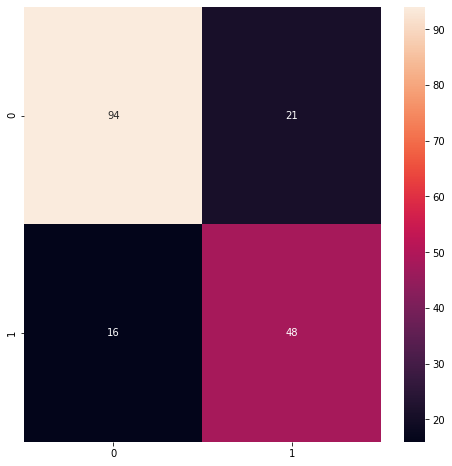

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix
Y_Pred = logreg.predict(X_CV)
print("Accuracy: ", accuracy_score(Y_Pred, Y_CV)*100, "%")

plt.figure(figsize = (8,8))
sns.heatmap(confusion_matrix(Y_Pred, Y_CV), annot = True, fmt = '.3g')
plt.show()

You can understand more about the Confusion Matric [here](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

That's all for this notebook. Next up we have Decision Trees and Support Vector machines.